In [1]:
from iSDM.species import Species, GBIFSpecies

In [2]:
my_species = GBIFSpecies(name_species="Etheostoma_blennioides")

In [3]:
my_species.name_species

'Etheostoma_blennioides'

#### just some logging logic to output in this notebook, nothing to care about.

In [4]:
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())

## 1. Find and download all matching species data from GBIF, show only first 5 observation rows (head()). At this point no data cleaning is done yet.

In [5]:
my_species.find_species_occurrences().head()

Loading species ... 
Number of occurrences: 7226 
True
Loaded species: ['Etheostoma blennioides'] 


,accessRights,associatedOccurrences,associatedReferences,associatedSequences,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,...,type,typeStatus,verbatimCoordinateSystem,verbatimDepth,verbatimElevation,verbatimEventDate,verbatimLocality,vernacularName,waterBody,year
0,"Open Access, http://creativecommons.org/public...",NaN,NaN,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 028456),YPM ICH 028456,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2015.0
1,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,1937841,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,Thu Sep 10 2015 14:51:49 GMT-0400 (EDT),"3827–4235 Fobes Rd, Rock Creek, OH, US",NaN,NaN,2015.0
2,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,623289,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,2014-04-13,Beaver Creek,NaN,NaN,2014.0
3,"Open Access, http://creativecommons.org/public...",NaN,Det. by: Thomas J. Near,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 026964),YPM ICH 026964,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2014.0
4,"Open Access, http://creativecommons.org/public...",NaN,"Det. by: William Freedburg, Thomas J. Near",NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 027023),YPM ICH 027023,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2014.0


#### taxonkey derived from GBIF data. It's a sort of unique ID per species

In [6]:
my_species.ID # taxonkey derived from GBIF. It's a sort of unique ID per species

2382397

### Data is serialized and saved in a file. 
#### Default location: current working directory. Default filename: GBIFID of the species

In [7]:
my_species.save_data()

Saved data: /home/daniela/git/iSDM/2382397.pkl 


In [8]:
my_species.source.name

'GBIF'

### Let's get a general idea of where the species is distributed

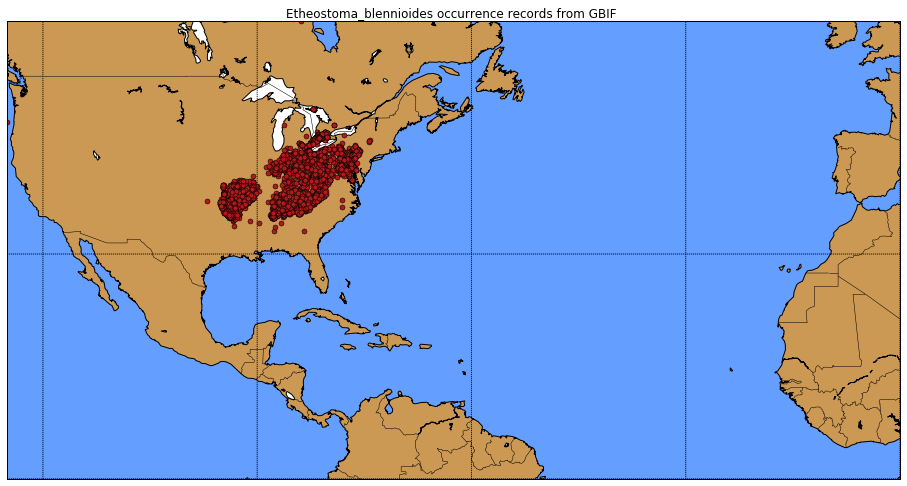

In [9]:
%matplotlib inline
my_species.plot_species_occurrence()

#### The map is always zoomed to the species borders. Notice low right corner also has one red point.

## 2. Or just load existing data into a Species object. Let's use the file we saved before.

In [10]:
data = my_species.load_data("./2382397.pkl") # or just load existing data into Species object

Loading data from: ./2382397.pkl
Succesfully loaded previously saved data.


In [11]:
data.columns # all the columns available per observation

Index(['accessRights', 'associatedOccurrences', 'associatedReferences',
       'associatedSequences', 'basisOfRecord', 'bibliographicCitation',
       'catalogNumber', 'class', 'classKey', 'collectionCode',
       ...
       'type', 'typeStatus', 'verbatimCoordinateSystem', 'verbatimDepth',
       'verbatimElevation', 'verbatimEventDate', 'verbatimLocality',
       'vernacularName', 'waterBody', 'year'],
      dtype='object', length=138)

## 3. Examples of simple (meta-)data exploration

### show all unique values of the 'country' column

In [12]:
data['country'].unique().tolist()

['United States', nan, 'Canada', 'Namibia', 'India']

In [13]:
data.shape # there are 7226 observations, 138 parameters per observation

(7226, 138)

In [14]:
data['vernacularName'].unique().tolist() # self-explanatory

['perches; perch-like fishes; ray-finned fishes; vertebrates; chordates; animals',
 nan,
 'Greenside Darter',
 'GREENSIDE DARTER',
 'greenside darter']

### How about latitude/longitude? Does the data need cleaning?
#### head() or tail() is only used to limit the tabular output in this notebook. The "data" structure contains it all.

In [15]:
data['decimalLatitude'].tail(10)

7216    43.03333
7217    34.84256
7218         NaN
7219    43.03333
7220         NaN
7221         NaN
7222         NaN
7223         NaN
7224    41.38022
7225         NaN
Name: decimalLatitude, dtype: float64

### Hmm, so some values are 'NaN', which means not available.  
#### We can fill them with something (default?), or drop those records where latitude/longitude are not available. Let's drop records where the latitude/longitude data is not available

In [16]:
import numpy as np
data_cleaned = data.dropna(subset = ['decimalLatitude', 'decimalLongitude']) # drop records where data not available

In [17]:
data_cleaned.shape # less occurrence records now: 5223

(5223, 138)

In [18]:
data_cleaned['basisOfRecord'].unique()

array(['PRESERVED_SPECIMEN', 'HUMAN_OBSERVATION', 'UNKNOWN'], dtype=object)

In [19]:
data_cleaned[['dateIdentified', 'day', 'month', 'year']].head()

,dateIdentified,day,month,year
0,NaN,23.0,5.0,2015.0
1,2015-09-11T23:37:54.000+0000,10.0,9.0,2015.0
2,2014-04-14T00:24:18.000+0000,13.0,4.0,2014.0
3,NaN,13.0,5.0,2014.0
4,NaN,14.0,5.0,2014.0


#### Seems like not all records have a 'dateIdentified', but 'day','month', 'year' fields are there for many (all?) records.

### Select only observation records newer than 2010; only latitude, longitude, rightsHolder, datasetName columns are interesting

In [20]:
data_selected = data_cleaned[data_cleaned['year']>2010][['decimalLatitude','decimalLongitude', 'rightsHolder', 'datasetName']]

### more filtering: select only those with a non-null datasetName

In [21]:
data_selected[~data_selected.datasetName.isnull()].head(10)

,decimalLatitude,decimalLongitude,rightsHolder,datasetName
1,41.79664,-80.97289,Robert L Curtis,iNaturalist research-grade observations
2,37.97240,-83.56716,Brian Wulker,iNaturalist research-grade observations
10,35.07780,-83.97430,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
13,35.17770,-83.88780,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
20,35.16030,-83.92020,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
39,36.40790,-81.40160,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
48,36.41300,-81.40710,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
51,36.55790,-81.21670,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
52,36.54960,-81.00230,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
54,36.38760,-91.53010,NaN,Auburn University Museum Fish Collection


### If you hare happy with this filtering, and you want to save the species data:

In [22]:
my_species.set_data(data_selected) # update the object "my_species" to contain the filtered data

In [23]:
my_species.save_data(filename="updated_dataset.pkl")

Saved data: /home/daniela/git/iSDM/updated_dataset.pkl 


### Plot our filtered selection 

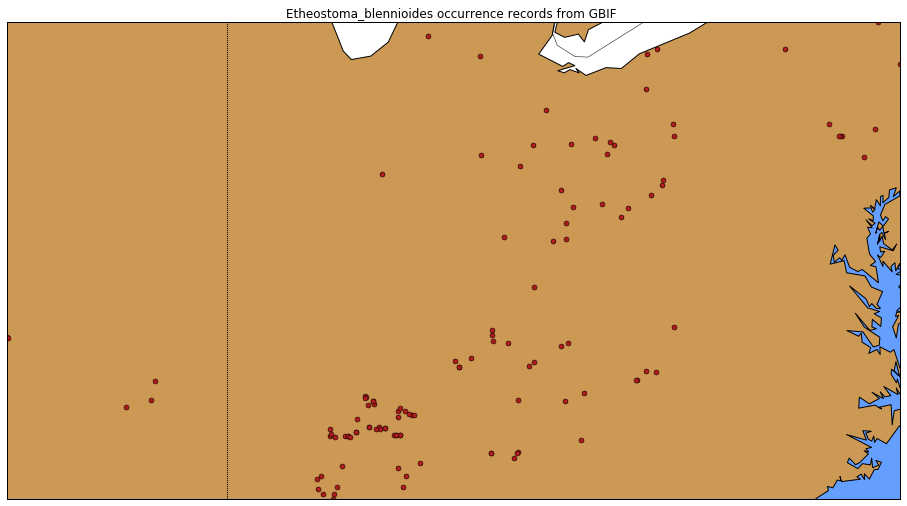

In [24]:
my_species.plot_species_occurrence()

In [29]:
my_species.get_data().shape # there are 119 records now

(119, 4)

In [13]:
csv_data = my_species.load_csv('./data/GBIF.csv') # or load data from downloaded csv file (from GBIF website, not API)

Loading data from: ./data/GBIF.csv
Succesfully loaded previously CSV data.
Updated species ID: 2382397 


In [14]:
csv_data.head()

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,recordnumber,identifiedby,rights,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
0,1224542608,71e6db8e-f762-11e1-a439-00145eb45e9a,urn:catalog:OMNH:FISH:85718,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,Dr. Aaron Geheber,NaN,Sam Noble Oklahoma Museum of Natural History,Aaron Geheber,NaN,NaN,2015-12-23T21:01Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
1,17598896,83a8c0da-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,"Baldwin, M.E.",NaN,NaN,"Baldwin, M.E.; Bowlby, J.N.",NaN,NaN,2014-06-04T23:44Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
2,17598905,83a8c0da-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,"Baldwin, Mary Elizabeth",NaN,NaN,"Baldwin, Mary Elizabeth; Casbourn, Hugh R.",NaN,NaN,2014-06-04T23:44Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
3,198193430,961f602a-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,NaN,NaN,NaN,"R.D. Suttkus, Eaton & Donahue",NaN,NaN,2014-06-05T03:09Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
4,198193618,961f602a-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,NaN,NaN,NaN,"R.D. Suttkus, J.S. Ramsey & M.D. Dahlberg",NaN,NaN,2014-06-05T03:09Z,NaN,TAXON_MATCH_HIGHERRANK;GEODETIC_DATUM_ASSUMED_...


In [15]:
csv_data['specieskey'].unique()

array([2382397])

In [16]:
my_species.save_data()

Saved data: /home/daniela/git/iSDM/2382397.pkl 


In [17]:
csv_data.columns.size # csv data for some reason a lot less columns

42

In [18]:
data.columns.size

138

In [19]:
list(set(data.columns.tolist()) - set(csv_data.columns.tolist())) # hmm, 'decimalLatitude' vs 'decimallatitude'

['infraspecificEpithet',
 'collectionCode',
 'individualCount',
 'orderKey',
 'dynamicProperties',
 'depthAccuracy',
 'identifier',
 'geodeticDatum',
 'created',
 'rightsHolder',
 'datasetName',
 'taxonRemarks',
 'recordNumber',
 'taxonKey',
 'facts',
 'georeferenceSources',
 'license',
 'county',
 'elevationAccuracy',
 'eventID',
 'verbatimElevation',
 'islandGroup',
 'collectionID',
 'dateIdentified',
 'occurrenceRemarks',
 'eventDate',
 'media',
 'verbatimDepth',
 'higherClassification',
 'accessRights',
 'identifiedBy',
 'associatedSequences',
 'protocol',
 'phylumKey',
 'issues',
 'vernacularName',
 'otherCatalogNumbers',
 'coordinateAccuracyInMeters',
 'institutionCode',
 'disposition',
 'modified',
 'fieldNotes',
 'verbatimCoordinateSystem',
 'occurrenceStatus',
 'lastCrawled',
 'associatedOccurrences',
 'decimalLongitude',
 'locationID',
 'http://unknown.org/occurrenceDetails',
 'type',
 'locationAccordingTo',
 'familyKey',
 'stateProvince',
 'startDayOfYear',
 'typeStatus',
 '

In [20]:
list(set(csv_data.columns.tolist()) - set(data.columns.tolist()))

['specieskey',
 'taxonkey',
 'lastinterpreted',
 'scientificname',
 'taxonrank',
 'elevationaccuracy',
 'infraspecificepithet',
 'gbifid',
 'basisofrecord',
 'establishmentmeans',
 'countrycode',
 'mediatype',
 'recordedby',
 'issue',
 'recordnumber',
 'occurrenceid',
 'decimallatitude',
 'identifiedby',
 'depthaccuracy',
 'datasetkey',
 'institutioncode',
 'catalognumber',
 'typestatus',
 'collectioncode',
 'publishingorgkey',
 'eventdate',
 'rightsholder',
 'decimallongitude']

In [91]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [92]:
geolocator.geocode("Vidoe Smilevski Bato, Skopje, Macedonia")

Location(Булевар Видое Смилевски Бато, Реонски Центар Аеродром, Скопје, Општина Аеродром, Град Скопје, Скопски Регион, 1000, Македонија, (41.9801537, 21.4768662, 0.0))

In [94]:
geolocator.reverse("41.9801537, 21.4768662")

Location(Рамстор, 10А, Булевар Видое Смилевски Бато, Реонски Центар Аеродром, Скопје, Општина Аеродром, Град Скопје, Скопски Регион, 1000, Македонија, (41.9794894, 21.4764231, 0.0))

In [95]:
from geopy.distance import vincenty

In [96]:
skopje = (41.9794894, 21.4764231)

In [97]:
geolocator.geocode("Ohrid, Macedonia")

Location(Охрид, Општина Охрид, Југозападен Регион, Македонија, (41.1127104, 20.7993744, 0.0))

In [98]:
ohrid = (41.1127104, 20.7993744)

In [100]:
vincenty(skopje,ohrid).kilometers

111.61807162804502

In [101]:
geolocator.geocode("Amsterdam, Netherlands")

Location(Amsterdam, Centrum, Amsterdam, MRA, Stadsregio Amsterdam, Noord-Holland, Nederland, (52.374436, 4.8979956033677, 0.0))

In [102]:
amsterdam = (52.374436, 4.8979956033677)

In [103]:
vincenty(skopje,amsterdam).kilometers

1699.8259367078563

In [11]:
import os
from osgeo import ogr
daShapefile = "/home/daniela/git/iSDM/data/FW_SHRIMP/FW_SHRIMPS.shp"


In [12]:
driver = ogr.GetDriverByName('ESRI Shapefile')

In [13]:
dataSource = driver.Open(daShapefile, 0) # 0 means read-only. 1 means writeable.

In [14]:
layer = dataSource.GetLayer()
featureCount = layer.GetFeatureCount()
for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())


POINT (24.595046691894176 -1.924423653224926)
POINT (127.908131559974407 26.572772893063011)
POINT (51.868779909514899 -1.381283576802766)
POINT (78.971131424698783 10.767284990772433)
POINT (43.763865610039474 -9.167971837418698)
POINT (85.374360183587228 19.720288401313706)
POINT (109.220140575879896 27.726276932336045)
POINT (103.698690281043568 2.004319984094406)
POINT (77.380915767499303 8.383299845630935)
POINT (109.128744997176838 0.632907251139968)
POINT (101.513267153881927 7.043133052525765)
POINT (111.451311757316006 2.159298200241736)
POINT (114.0890886333559 27.507021862879906)
POINT (29.903792515206639 -1.292167883837752)
POINT (117.996262609445282 5.455255486779808)
POINT (100.983750333945508 22.794539761469984)
POINT (101.545921880848354 18.655981784631816)
POINT (101.212530419255074 16.833699200040527)
POINT (98.352909336563499 18.73441407405662)
POINT (20.526065990164287 -7.544663596936977)
POINT (120.349661580648956 -5.481937970715197)
POINT (109.590638467848194 28.1

In [16]:
from rpy2.robjects import r

In [15]:
smaller_data = data.head()
import pandas as pd

In [23]:
smaller_data = data[['decimalLatitude', 'decimalLongitude']].head()

In [24]:
smaller_data

,decimalLatitude,decimalLongitude
0,35.53250,-87.29580
1,41.79664,-80.97289
2,37.97240,-83.56716
3,36.77431,-84.88030
4,36.73364,-85.22733


In [25]:
r_dataframe = com.convert_to_r_dataframe(smaller_data)

NameError: name 'com' is not defined

In [26]:
from pandas.io.pytables import HDFStore

In [27]:
store = HDFStore('store.h5')

In [28]:
smaller_data

,decimalLatitude,decimalLongitude
0,35.53250,-87.29580
1,41.79664,-80.97289
2,37.97240,-83.56716
3,36.77431,-84.88030
4,36.73364,-85.22733


In [32]:
data.dtypes

accessRights                   object
associatedOccurrences          object
associatedReferences           object
associatedSequences            object
basisOfRecord                  object
bibliographicCitation          object
catalogNumber                  object
class                          object
classKey                        int64
collectionCode                 object
collectionID                   object
continent                      object
coordinateAccuracy            float64
coordinateAccuracyInMeters    float64
country                        object
countryCode                    object
county                         object
created                        object
datasetID                      object
datasetKey                     object
datasetName                    object
dateIdentified                 object
day                           float64
decimalLatitude               float64
decimalLongitude              float64
depth                         float64
depthAccurac

In [35]:
data['datasetID'].unique()

array([nan, 'NCSM-FishesDWC', 'fishes-23-may-2016', '10'], dtype=object)

In [42]:
import os
from osgeo import ogr
daShapefile = "/home/daniela/git/iSDM/data/species_185500/species_185500.shp"

driver = ogr.GetDriverByName('ESRI Shapefile')
dataSource = driver.Open(daShapefile, 0) # 0 means read-only. 1 means writeable.
layer = dataSource.GetLayer()
featureCount = layer.GetFeatureCount()
aman = []
for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())
    aman.append(geom.Centroid().ExportToWkt())

POINT (-0.632175607599714 11.570660607271602)
POINT (1.832231123222458 14.922211514830851)
POINT (7.706443597807635 13.868542396787561)
POINT (-6.769672137020654 13.233945738196546)
POINT (2.442516451699403 12.795415163651672)
POINT (-5.191759111446657 12.792212735972159)
POINT (-3.533649179447996 7.883391904553427)
POINT (-6.571592614567346 12.563459998139418)
POINT (-7.15013913103079 12.348437510608434)
POINT (-13.279205718931538 11.330392420465211)
POINT (-11.58007444773124 11.09825956256074)
POINT (4.637904926047515 10.941119684085024)
POINT (6.212638009823476 10.851023811435287)
POINT (-1.564373536009109 10.612009957887173)
POINT (-0.47439837942741 10.143187715047185)
POINT (-1.927403482347587 10.161702848377946)
POINT (6.569292354800278 9.959136216234961)
POINT (5.808270434206407 9.990840254124329)
POINT (4.638648123924026 9.872381760487933)
POINT (13.931104678038581 9.675906128670672)
POINT (4.851750652651517 9.427390848399051)
POINT (-1.127381973387113 8.996862748187393)
POINT 

In [16]:
from shapely.geometry import Point

In [17]:
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000

In [18]:
import numpy as np
xc = (xmax - xmin) * np.random.random(2000) + xmin

In [19]:
yc = (ymax - ymin) * np.random.random(2000) + ymin

In [20]:
import geopandas as gpd
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

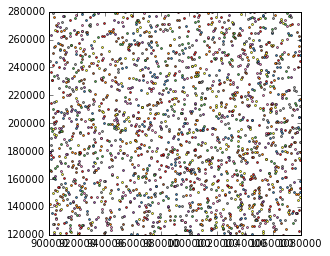

In [22]:
pts.plot()

In [23]:
%matplotlib inline

In [57]:
type(pts)

geopandas.geoseries.GeoSeries

In [9]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numpy import array, arange
import matplotlib

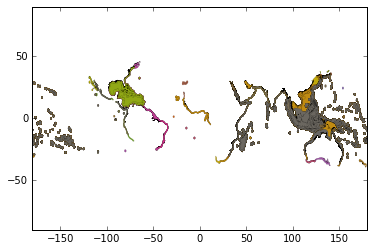

In [15]:
sf = shapefile.Reader("/home/daniela/git/iSDM/data/BUTTERFLYFISH/BUTTERFLYFISH.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)
cns     = []
for nshp in range(Nshp):
    cns.append(recs[nshp][1])
cns = array(cns)
cm    = matplotlib.cm.get_cmap('Dark2')
cccol = cm(1.*arange(Nshp)/Nshp)
#   -- plot --
fig     = plt.figure()
ax      = fig.add_subplot(111)
for nshp in range(Nshp):
    ptchs   = []
    pts     = array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    for pij in range(len(prt)):
     ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))
ax.set_xlim(-180,+180)
ax.set_ylim(-90,90)
fig.savefig('test1.png')